# Background 

The role of market and customer segmentation in businesses is important. Companies need to understand the diverse needs, preferences, and price sensitivities of different consumers to tailor their pricing, product quality, and marketing efforts to specific customer groups. Analysis by Harvard Management Update (2008) shows that over five years, businesses that successfully tailor product and service offerings to desirable customer segments post annual profit growth of about 15%. By contrast, companies that fail to connect the right value propositions to the right customer segments realize annual profit growth of only 5%. For this analysis, we wanted to understand the potential customer segment for this particular supermarket, based on the data provided to maximize company profits for the future.


Reference: Find Your Sweet Spot by Harvard Management Update (https://hbr.org/2008/02/find-your-sweet-spot-1)


# Problem Statement

What is the most profitable customer segment that we can target and its characteristics?


# Goal 

Leverage the insights gained about the potential target customer segment for improving efficiencies or increasing profit in the future.

# Data Understanding 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Overall Data

In [2]:
raw_data = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df = raw_data.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


This dataset contains information of supermarket customers with 4 data groups and 29 columns, with the following information :

People\
●   ID: Customer's unique identifier\
●   Year_Birth: Customer's birth year\
●   Education: Customer's education level\
●   Marital_Status: Customer's marital status\
●   Income: Customer's yearly household income\
●   Kidhome: Number of children in customer's household\
●   Teenhome: Number of teenagers in customer's household\
●   Dt_Customer: Date of customer's enrollment with the company\
●   Recency: Number of days since customer's last purchase\
●   Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products\
●   MntWines: Amount spent on wine in last 2 years\
●   MntFruits: Amount spent on fruits in last 2 years\
●   MntMeatProducts: Amount spent on meat in last 2 years\
●   MntFishProducts: Amount spent on fish in last 2 years\
●   MntSweetProducts: Amount spent on sweets in last 2 years\
●   MntGoldProds: Amount spent on gold in last 2 years

Promotion\
●   NumDealsPurchases: Number of purchases made with a discount\
●   AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise\
●   AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise\
●   AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise\
●   AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise\
●   AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise\
●   Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place\
●   NumWebPurchases: Number of purchases made through the company’s website\
●   NumCatalogPurchases: Number of purchases made using a catalog\
●   NumStorePurchases: Number of purchases made directly in stores\
●   NumWebVisitsMonth: Number of visits to the company’s website in the last month

# Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)
pd.set_option('display.max_colwidth', 0)
tabel_desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Based on the information above, we can conclude that :
* ID, Marital_Status, and Education column could be considered as categorical data
* There are columns with incorrect data type such as Year_Birth and Dt_Customer.
* Column Z_CostContact and Z_Revenue only contains one value across all rows. For analysis purposes, these columns could be dropped.
* Column AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response could be considered as binary categorical data.	

## Missing Values

In [5]:
df.isna().sum().sort_values(ascending = False)

Income                 24
ID                     0 
NumDealsPurchases      0 
Z_Revenue              0 
Z_CostContact          0 
Complain               0 
AcceptedCmp2           0 
AcceptedCmp1           0 
AcceptedCmp5           0 
AcceptedCmp4           0 
AcceptedCmp3           0 
NumWebVisitsMonth      0 
NumStorePurchases      0 
NumCatalogPurchases    0 
NumWebPurchases        0 
MntGoldProds           0 
Year_Birth             0 
MntSweetProducts       0 
MntFishProducts        0 
MntMeatProducts        0 
MntFruits              0 
MntWines               0 
Recency                0 
Dt_Customer            0 
Teenhome               0 
Kidhome                0 
Marital_Status         0 
Education              0 
Response               0 
dtype: int64

In [6]:
# Percentage of Missing Values
(df.isna().sum()/df.shape[0]*100).sort_values(ascending = False)

Income                 1.071429
ID                     0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
MntGoldProds           0.000000
Year_Birth             0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Response               0.000000
dtype: float64

<Axes: >

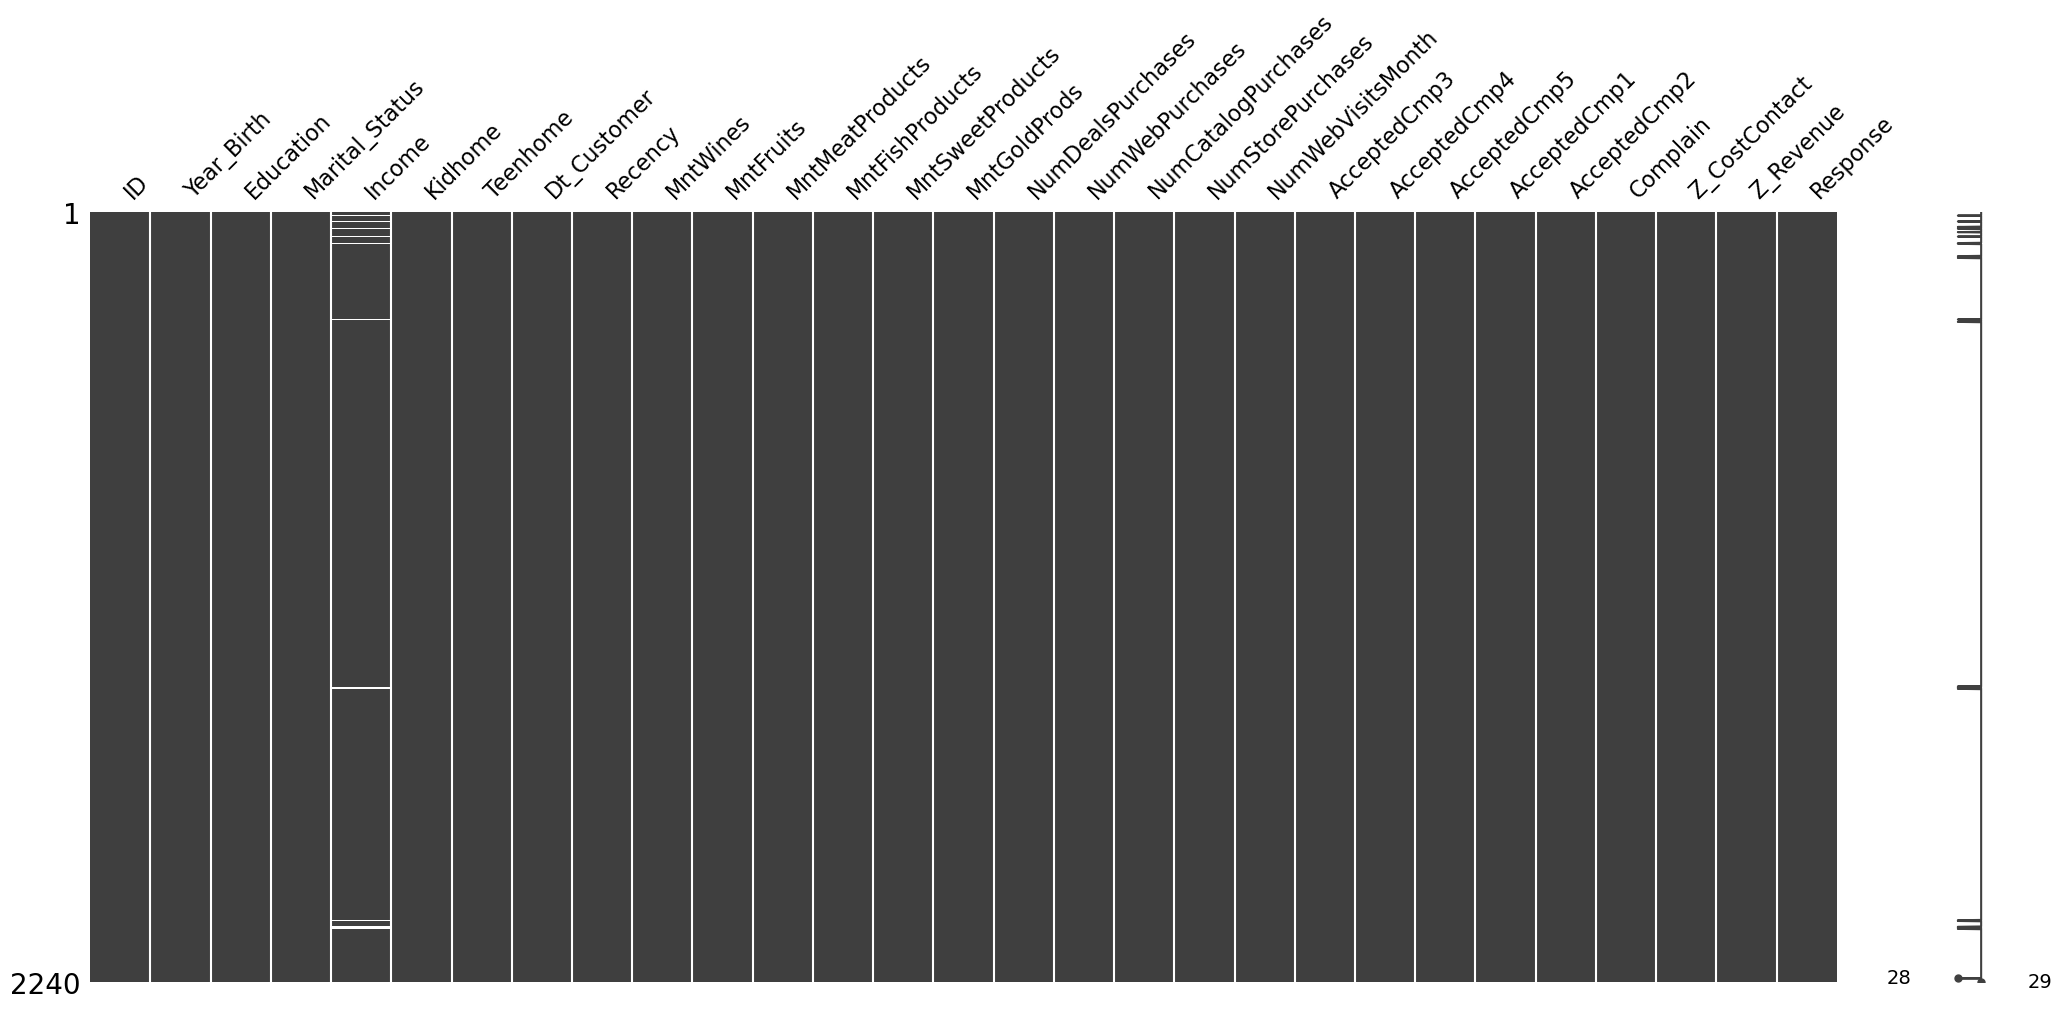

In [7]:
import missingno
missingno.matrix(df)

Based on the information above, only Income column contains missing values, on 24 rows or 1.071429 % of the whole data.

## Numeric Data

In [8]:
numerik = df.select_dtypes(include='number').drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response','Z_CostContact','Z_Revenue'])

### Descriptive Statistics

In [9]:
numerik.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


### Data Distribution

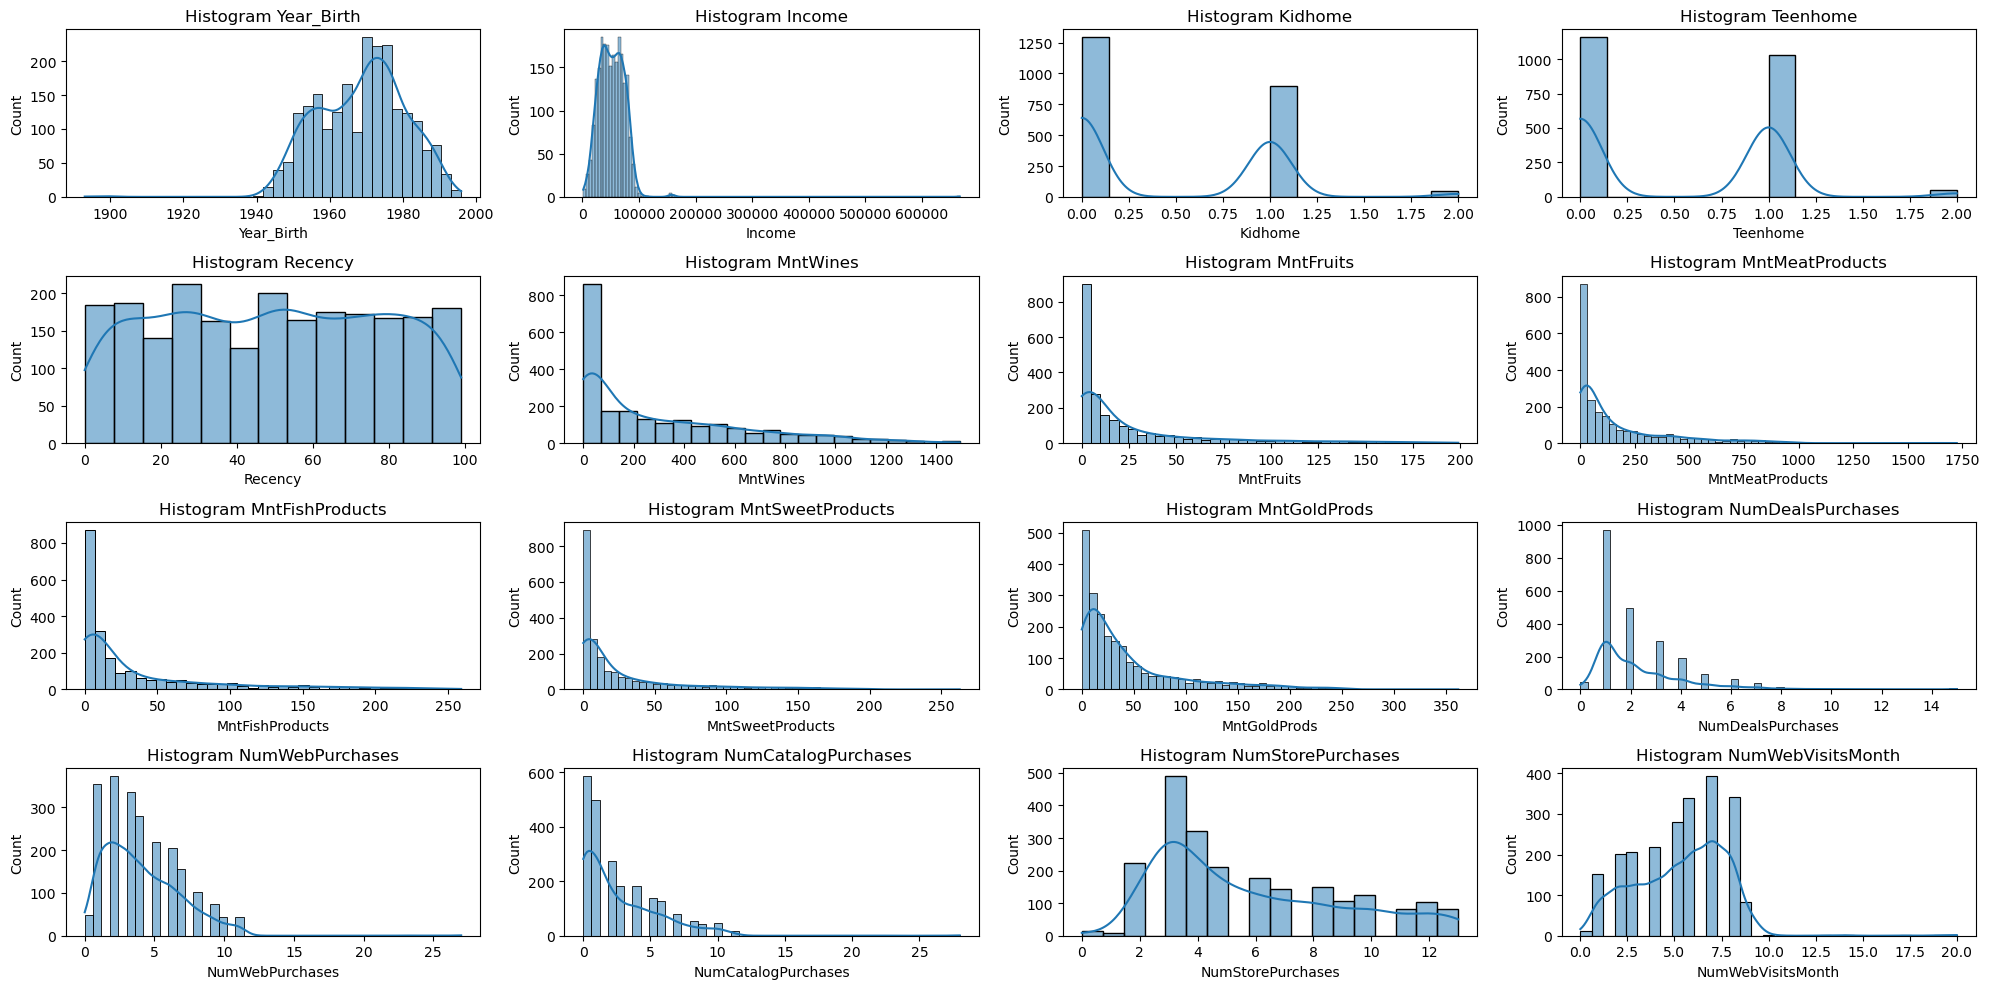

In [10]:
fig = plt.figure(figsize=(20,10)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,4,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"Histogram {kolom}")
    fig.tight_layout()
plt.show()

Based on information above, all numerical columns are not considered as normally distributed data.

### Outliers

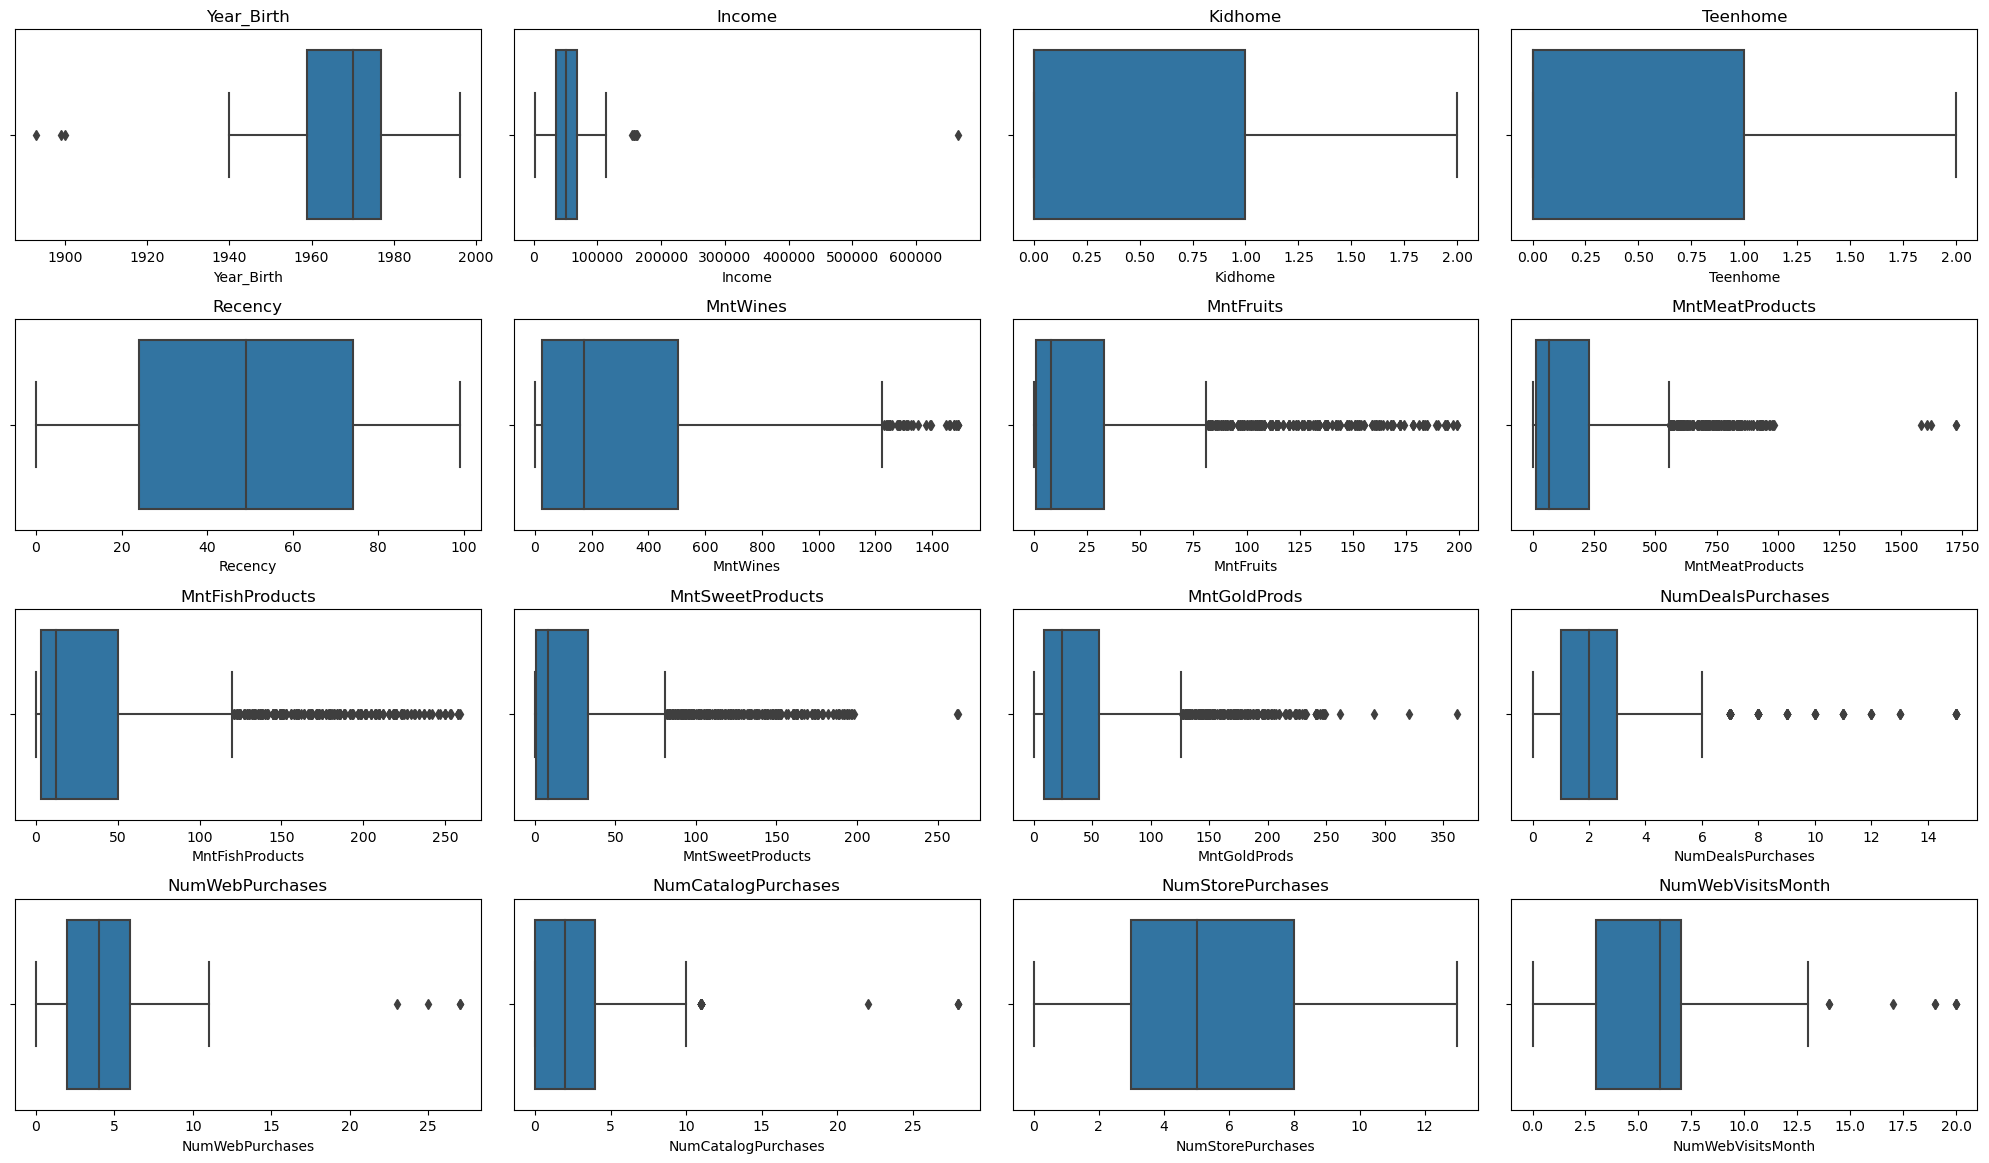

In [11]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(7,4,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout()
    plt.title(f'{kolom}')
plt.show()

In [12]:
jumlah_outliers = []

for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers.append(len(df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]))

pd.DataFrame({
    'Column':numerik.columns,
    'Outliers':jumlah_outliers,
})

,Column,Outliers
0,Year_Birth,3
1,Income,8
2,Kidhome,0
3,Teenhome,0
4,Recency,0
5,MntWines,35
6,MntFruits,227
7,MntMeatProducts,175
8,MntFishProducts,223
9,MntSweetProducts,248


### Correlation

In [13]:
numerik.corr(method='spearman')

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.000000,-0.217063,0.259345,-0.385527,-0.020661,-0.234200,-0.025445,-0.112499,-0.030594,0.003176,-0.076580,-0.086778,-0.164416,-0.178769,-0.167646,0.131069
Income,-0.217063,1.000000,-0.559909,0.045909,0.007938,0.830056,0.582379,0.816815,0.577392,0.567087,0.505550,-0.195533,0.573262,0.791841,0.731752,-0.643667
Kidhome,0.259345,-0.559909,1.000000,-0.046348,0.006299,-0.580307,-0.449922,-0.550614,-0.452752,-0.438709,-0.426392,0.260581,-0.421878,-0.597518,-0.556584,0.481648
Teenhome,-0.385527,0.045909,-0.046348,1.000000,0.009889,0.111409,-0.201159,-0.127521,-0.229479,-0.197954,-0.022725,0.480944,0.146133,-0.043755,0.077442,0.111633
Recency,-0.020661,0.007938,0.006299,0.009889,1.000000,0.018662,0.025295,0.027822,0.013305,0.024196,0.018376,0.007734,-0.003939,0.030690,0.005543,-0.021892
MntWines,-0.234200,0.830056,-0.580307,0.111409,0.018662,1.000000,0.517544,0.823652,0.524609,0.505322,0.575345,0.057165,0.740195,0.823421,0.806918,-0.389039
MntFruits,-0.025445,0.582379,-0.449922,-0.201159,0.025295,0.517544,1.000000,0.713169,0.705016,0.691356,0.568750,-0.109789,0.471341,0.634782,0.583358,-0.442861
MntMeatProducts,-0.112499,0.816815,-0.550614,-0.127521,0.027822,0.823652,0.713169,1.000000,0.726242,0.695704,0.637912,-0.032182,0.679243,0.851660,0.779336,-0.492302
MntFishProducts,-0.030594,0.577392,-0.452752,-0.229479,0.013305,0.524609,0.705016,0.726242,1.000000,0.700871,0.565283,-0.119759,0.466423,0.657124,0.582713,-0.458360
MntSweetProducts,0.003176,0.567087,-0.438709,-0.197954,0.024196,0.505322,0.691356,0.695704,0.700871,1.000000,0.542963,-0.105984,0.463586,0.627906,0.580889,-0.448597


<Axes: >

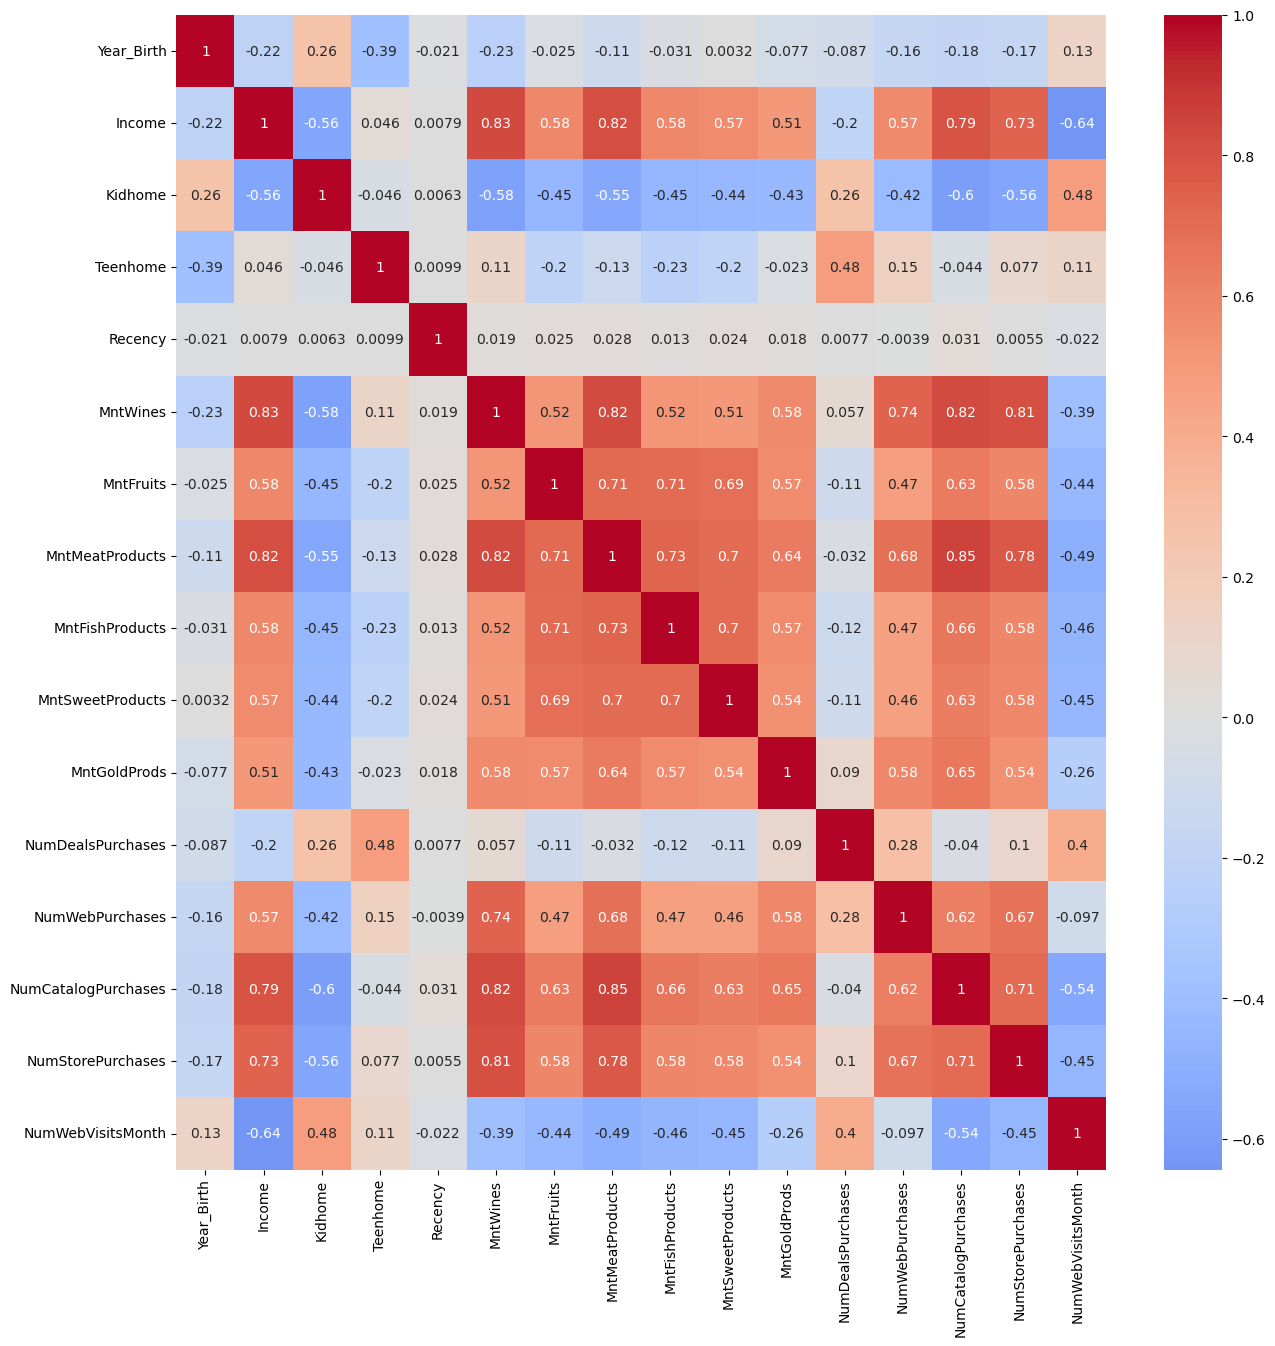

In [14]:
plt.subplots(figsize=(15,15))
sns.heatmap(numerik.corr(method='spearman'), annot=True, cmap="coolwarm", center=0)

Based on the heatmap graph above, we can conclude that the variables that have a strong positive correlation (>0.7) are as follows :
* MntWines vs Income
* MntMeatProducts vs Income
* NumCatalogPurchases vs Income
* NumStorePurchases vs Income
* MntMeatProducts vs MntWines
* NumWebPurchases vs MntWines
* NumCatalogPurchases vs MntWines
* NumStorePurchases vs MntWines
* MntMeatProducts vs MntFruits
* MntFishProducts vs MntFruits
* MntFishProducts vs MntMeatProducts
* MntSweetProducts vs MntMeatProducts
* NumCatalogPurchases vs MntMeatProducts
* NumStorePurchases vs MntMeatProducts
* MntSweetProducts vs MntFishProducts
* NumStorePurchases vs NumCatalogPurchases

Meanwhile, none of the variables have a strong negative correlation (< -0.7). The variables that have a moderately negative correlation (< -0.5) are as follows :
* Kidhome vs Income
* NumWebVisitMonth vs Income
* MntWines vs Kidhome
* MntMeatProducts vs Kidhome
* MntCatalogPurchases vs Kidhome
* MntStorePurchases vs Kidhome
* NumWebVisitMonth vs NumCatalogPurchases


## Categorical Data

In [15]:
kategorik = df[['ID','Marital_Status','Education', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']]
kategorik

,ID,Marital_Status,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,Single,Graduation,0,0,0,0,0,0,1
1,2174,Single,Graduation,0,0,0,0,0,0,0
2,4141,Together,Graduation,0,0,0,0,0,0,0
3,6182,Together,Graduation,0,0,0,0,0,0,0
4,5324,Married,PhD,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2235,10870,Married,Graduation,0,0,0,0,0,0,0
2236,4001,Together,PhD,1,0,0,0,0,0,0
2237,7270,Divorced,Graduation,0,0,0,1,0,0,0
2238,8235,Together,Master,0,0,0,0,0,0,0


In [16]:
kategorik.astype('object').describe()

,ID,Marital_Status,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,8,5,2,2,2,2,2,2,2
top,5524,Married,Graduation,0,0,0,0,0,0,0
freq,1,864,1127,2096,2210,2077,2073,2077,2219,1906


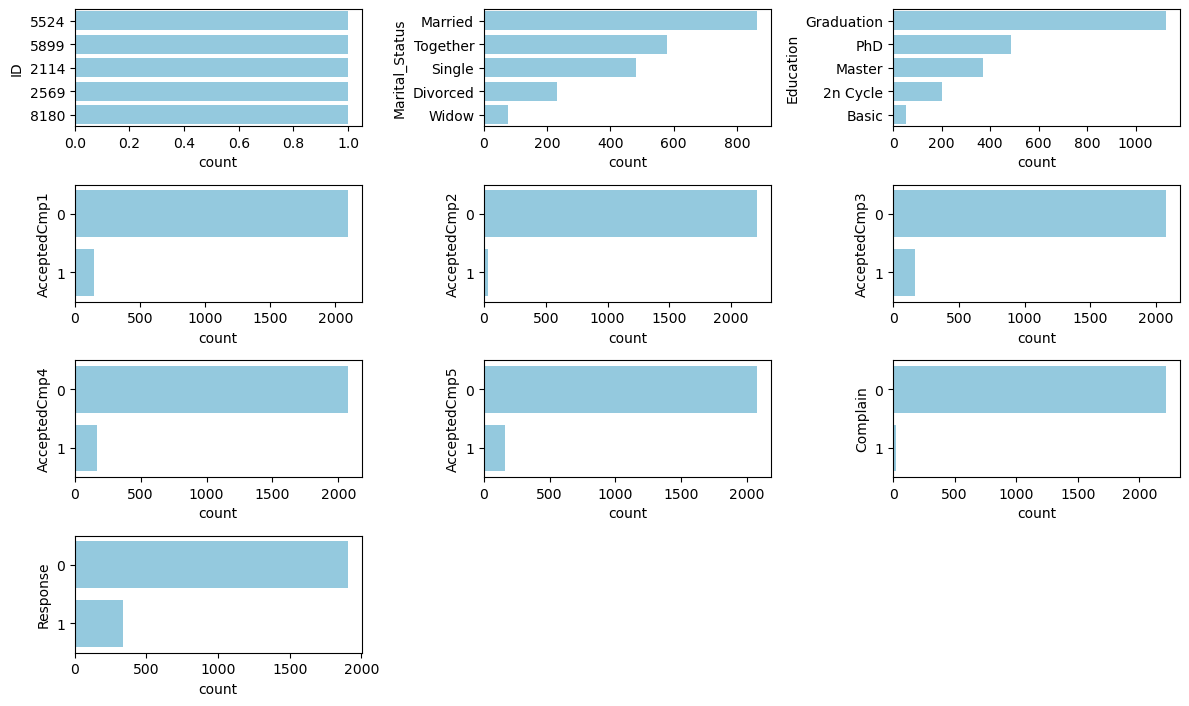

In [17]:
count = 0
fig = plt.figure(figsize=(12,12))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(7,3,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

Based on the data above, we can conclude that :
* There are no duplicate ID on the dataset.
* Most of the customers didn't file a complaint in the last 2 years.
* The highest number of customers in terms of marital status are in Married category
* The highest number of customars in terms of education levels are in Graduation category.
* Most of the customers didn't accept the offer in all promotional campaigns.

# Data Cleaning

In [18]:
df_prep = df.copy() # ini penting agar tidak terlalu jauh kalau ingin mengulang cleaning

## Handling Missing Values

<Axes: >

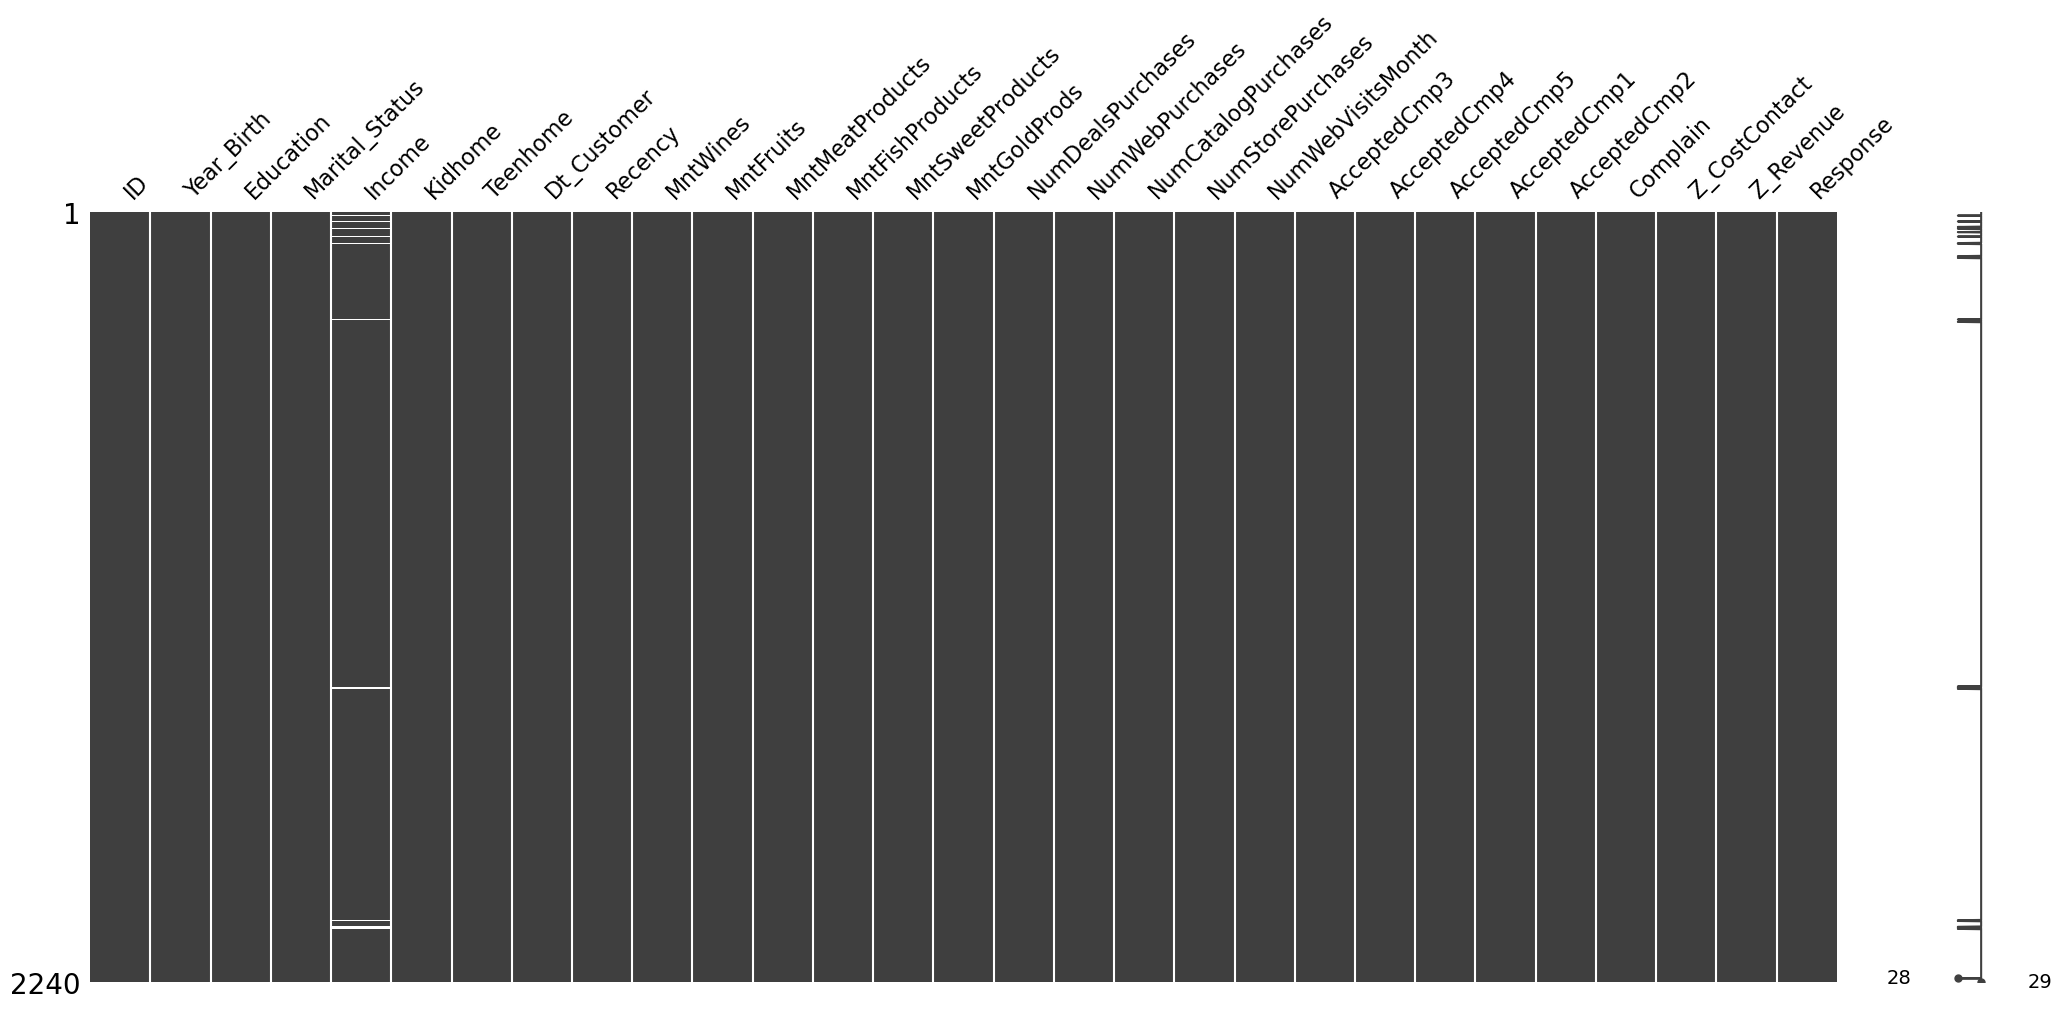

In [19]:
import missingno
missingno.matrix(df_prep)

In [20]:
df_prep[df_prep.isna().any(axis = 1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


### Income

Because the amount percentage of the missing value is low, we could fill the missing value with either mean or median value, depending on the data distribution. Considering the Income column shown as asymmetrically distributed data, we could fill the missing values with a median value of the Income column.

In [21]:
df_prep['Income'] = df_prep['Income'].fillna(df_prep['Income'].median())

<Axes: >

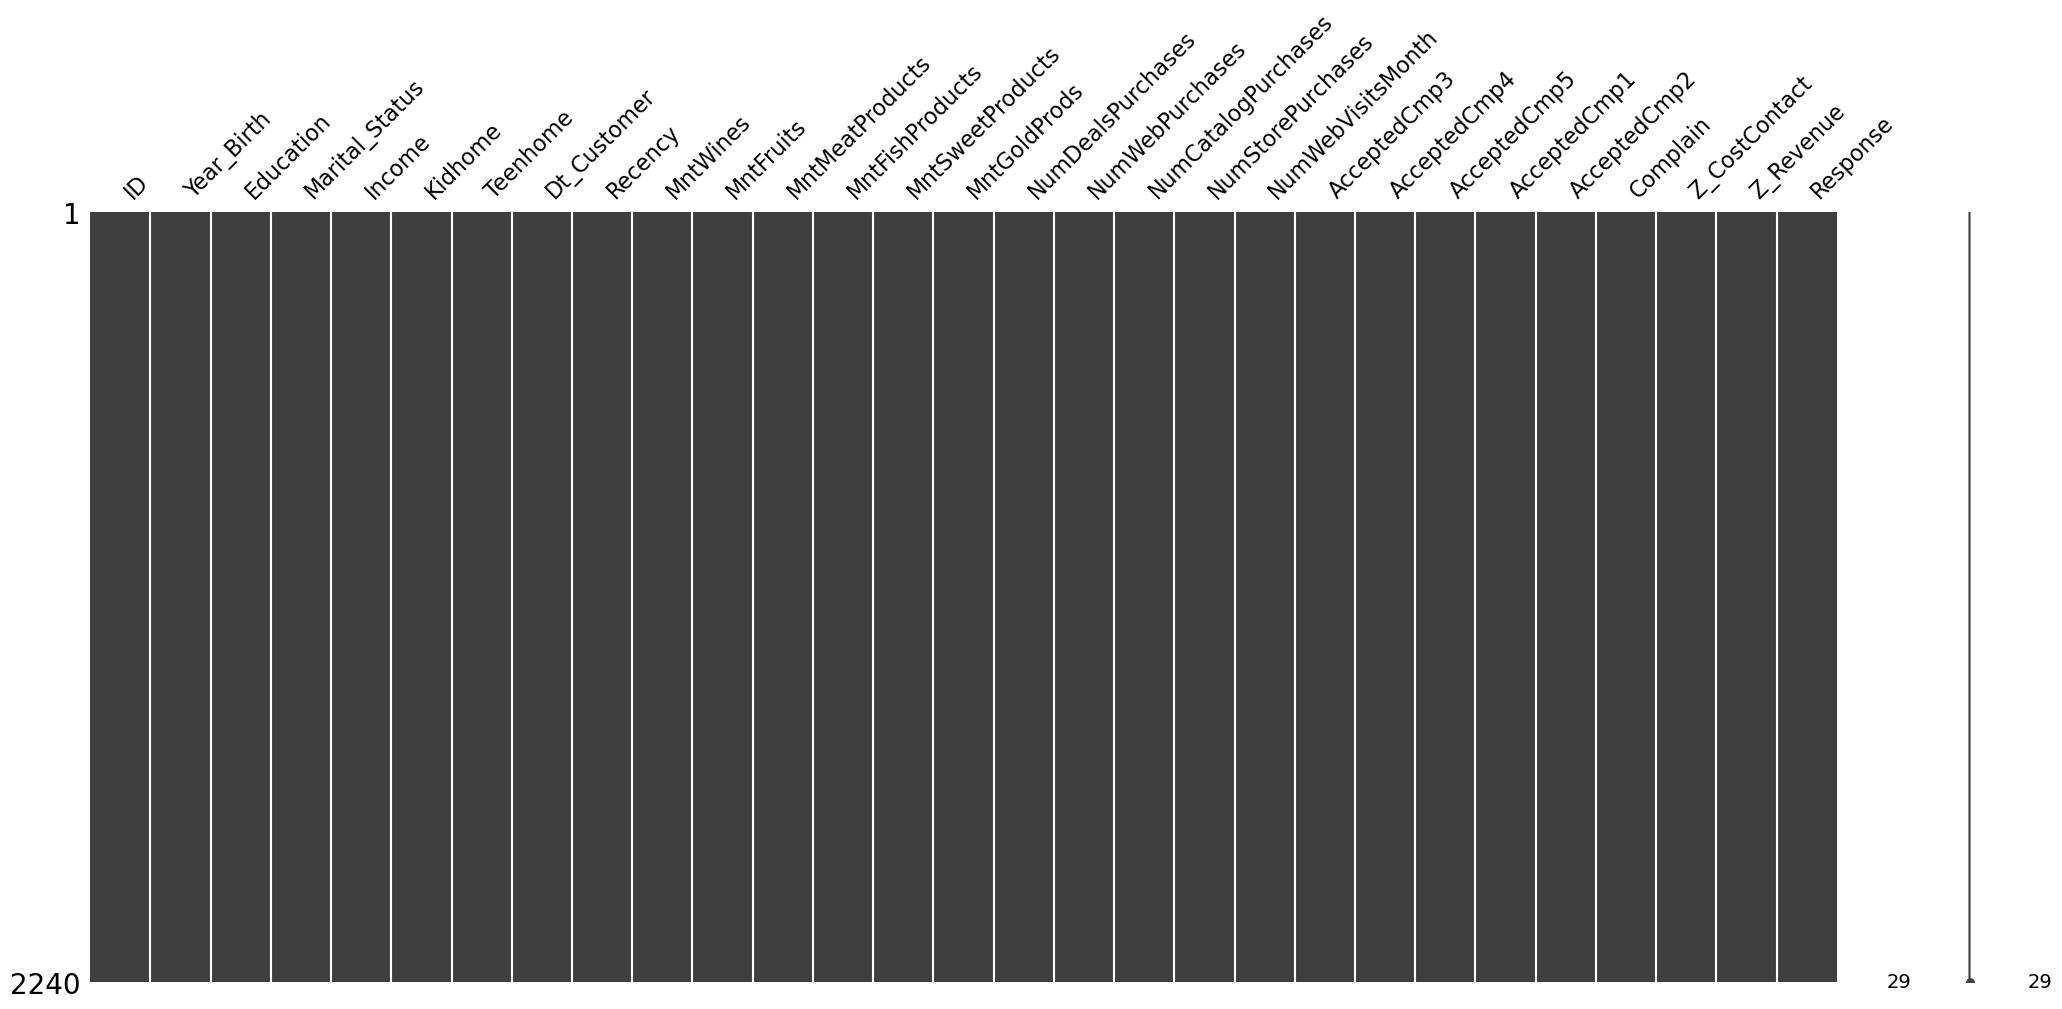

In [22]:
missingno.matrix(df_prep)

## Handling Outlier Data

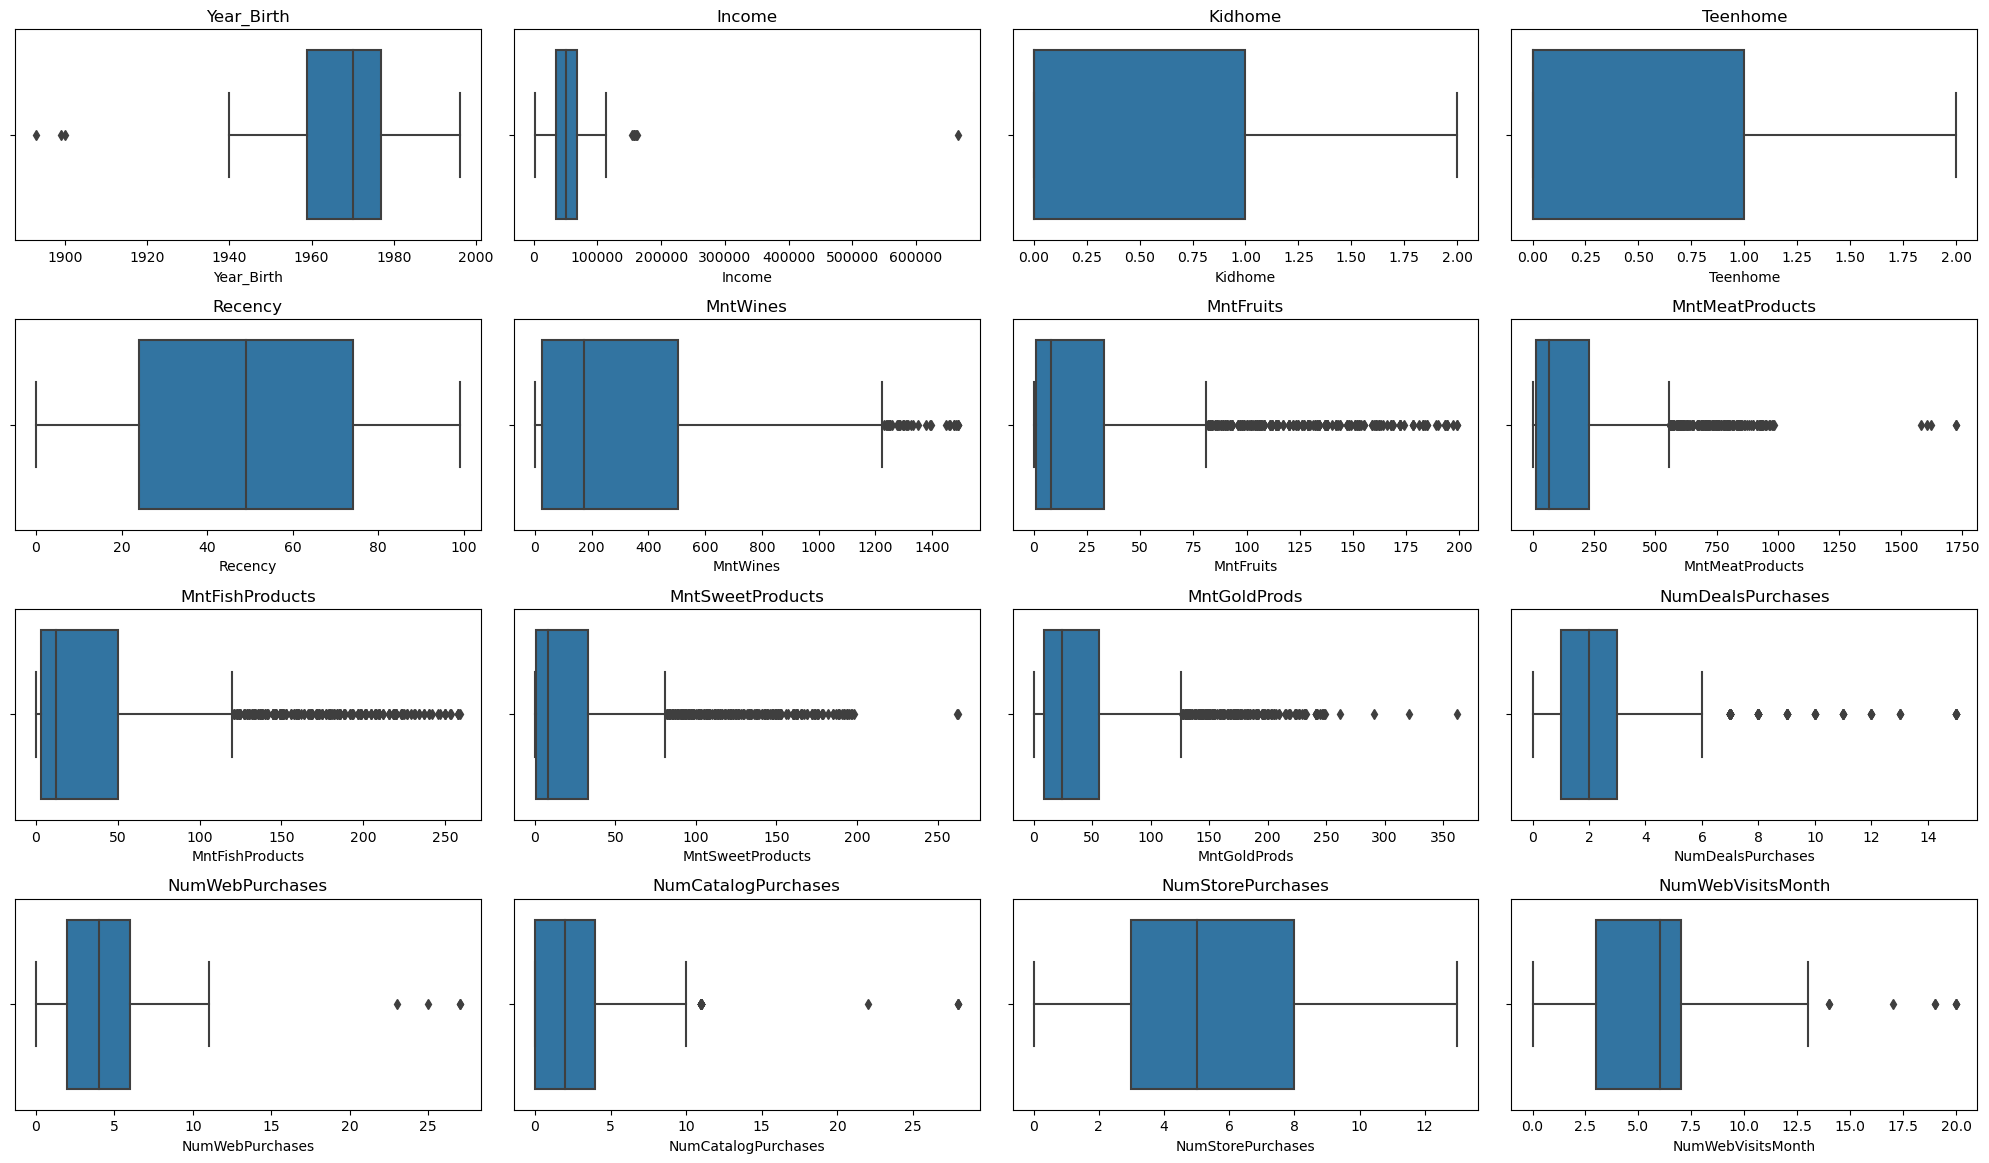

In [23]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(7,4,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout()
    plt.title(f'{kolom}')
plt.show()

### Year_Birth

<Axes: xlabel='Year_Birth'>

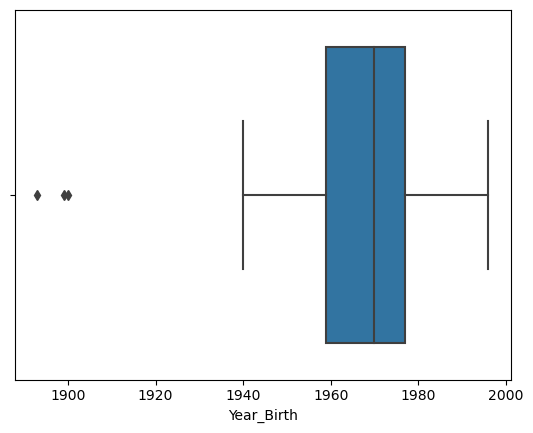

In [24]:
sns.boxplot(df_prep, x = 'Year_Birth')

In [25]:
df_prep[df_prep['Year_Birth'] < 1930]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


The 3 outliers from the 'Year_Birth' column are unrealistic, as it would suggest that the customer's ages are above 100 years old. Therefore, it is assumed as a false input and could be dropped from analysis.

In [26]:
Q1 = df_prep['Year_Birth'].quantile(0.25)
Q3 = df_prep['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_prep.drop(index=df_prep.query('Year_Birth < @lower').index, inplace=True)

<Axes: xlabel='Year_Birth'>

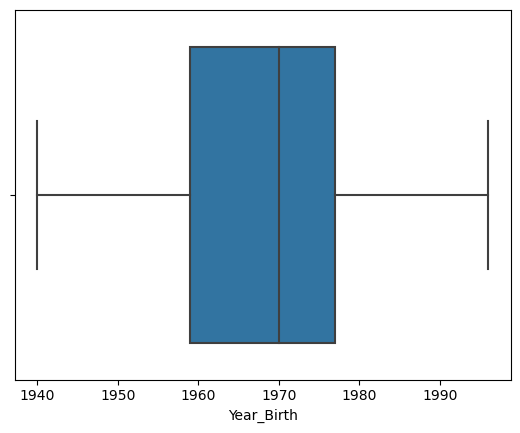

In [27]:
sns.boxplot(df_prep, x = 'Year_Birth')

### Income

<Axes: xlabel='Income'>

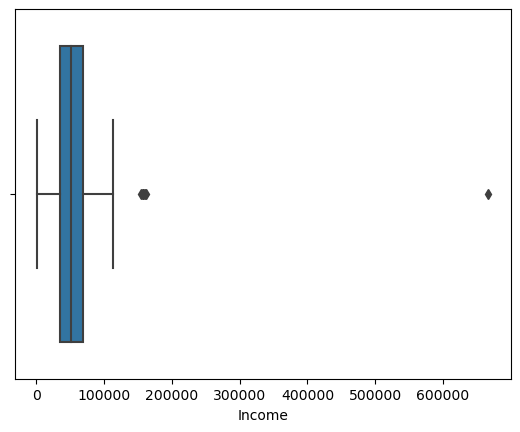

In [28]:
sns.boxplot(df_prep, x = 'Income')

In [29]:
Q1 = df_prep['Income'].quantile(0.25)
Q3 = df_prep['Income'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_prep[df_prep['Income'] > upper]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


All outliers are still realistic and make sense, except for the customer with ID 9432 and an Income with unusual number combination of 666666. It is likely that this is a false input and could significantly skew the analysis. Therefore, this outlier will be dropped.

In [30]:
df_prep.drop(index=2233, inplace=True)

<Axes: xlabel='Income'>

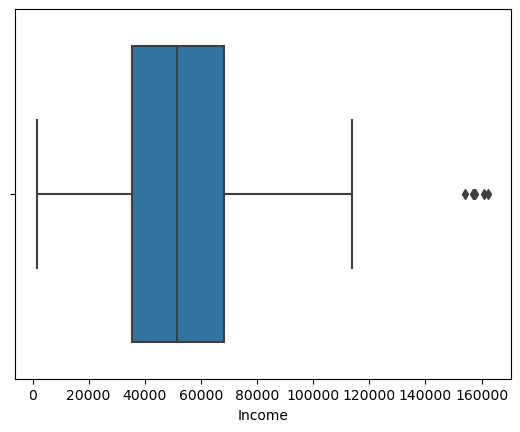

In [31]:
sns.boxplot(df_prep, x = 'Income')

### Outliers from Products and Places column group

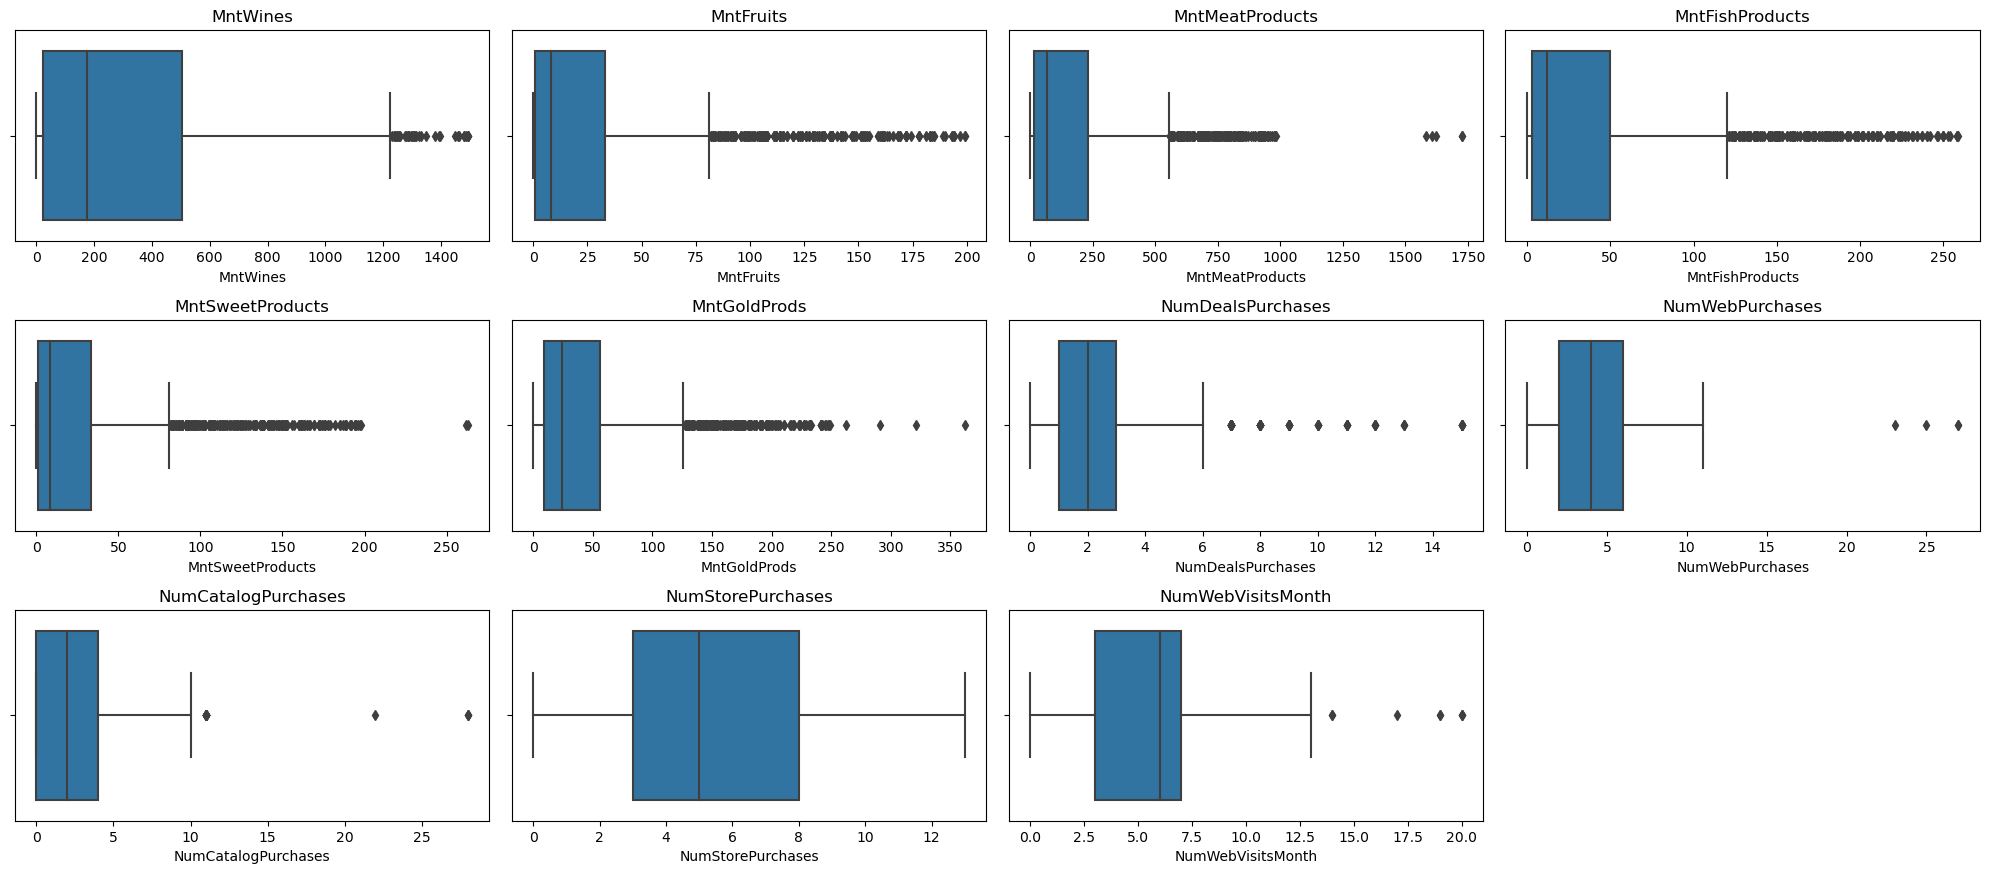

In [32]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal
data = df_prep.select_dtypes(include='number').drop(columns=['Year_Birth','Income','Kidhome','Teenhome','Recency','ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response','Z_CostContact','Z_Revenue'])
count = 0
for kolom in data.columns:
    count += 1
    plt.subplot(7,4,count)
    sns.boxplot(data, x = kolom)
    fig.tight_layout()
    plt.title(f'{kolom}')
plt.show()

Because the outlier values from these columns are still realistic, we could keep the data for analysis.

## Changing Data Types

Changing incorrect data types for 'Year_Birth' and 'Dt_Customer' column.

In [33]:
df_prep[['Year_Birth','Dt_Customer']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year_Birth   2236 non-null   int64 
 1   Dt_Customer  2236 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.4+ KB


In [34]:
df_prep['Dt_Customer'] = pd.to_datetime(df_prep['Dt_Customer'], format= '%d-%m-%Y')
df_prep['Year_Birth'] = pd.to_datetime(df_prep['Year_Birth'], format='%Y')

In [35]:
df_prep[['Year_Birth','Dt_Customer']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year_Birth   2236 non-null   datetime64[ns]
 1   Dt_Customer  2236 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 52.4 KB


## Simplify Categorical Values

The Education column could be simplified by considering '2n Cycle' value as 'Masters'

In [36]:
df_prep['Education'].replace({'Basic':'Primary/Secondary','Graduation':'Undergraduates', '2n Cycle':'Masters', 'Master':'Masters', 'PhD':'Doctorates'}, inplace=True)
print(df_prep['Education'].value_counts())

Education
Undergraduates       1126
Masters              571 
Doctorates           485 
Primary/Secondary    54  
Name: count, dtype: int64


The Marital_Status column could be simplified into 2 values, Single and Partnered, by considering 'Absurd', 'Alone', 'YOLO', 'Widow', 'Divorced' as 'Single', and 'Together', 'Married' as 'Partnered'.

In [37]:
df_prep['Marital_Status'].replace({'Absurd':'Single', 'Alone':'Single', 'YOLO':'Single', 'Widow':'Single', 'Divorced':'Single', 'Together':'Partnered', 'Married':'Partnered'}, inplace=True)
print(df_prep['Marital_Status'].value_counts())

Marital_Status
Partnered    1442
Single       794 
Name: count, dtype: int64


## Dropping Unused Column

The Z_CostContact and Z_Revenue are dropped as they only contain one value across all rows.

In [38]:
df_prep.drop(labels=['Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   datetime64[ns]
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   float64       
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

## Adding Additional Column

### Adding Age Column

This column represents customer's age. \
Age (Years Old) = Dt_Customer (Year) - Year_Birth

In [39]:
df_prep.insert(2, column='Age', value=df_prep['Dt_Customer'].sub(df_prep['Year_Birth'])/np.timedelta64(1, 'Y'))
df_prep['Age'] = df_prep['Age'].astype(int)
df_prep.head()


,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957-01-01,55,Undergraduates,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954-01-01,60,Undergraduates,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965-01-01,48,Undergraduates,Partnered,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984-01-01,30,Undergraduates,Partnered,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981-01-01,33,Doctorates,Partnered,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0


Converting back the Year_Birth column to only show year data

In [40]:
df_prep['Year_Birth'] = pd.DatetimeIndex(df_prep['Year_Birth']).year
df_prep.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,55,Undergraduates,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,Undergraduates,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,48,Undergraduates,Partnered,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,30,Undergraduates,Partnered,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,33,Doctorates,Partnered,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0


## Adding Total_Spent Column

This column represents the total amount spent on all products in the last 2 years. \
Total_Spent = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds

In [41]:
df_prep.insert(10, column='Total_Spent', value=df_prep['MntWines'] + df_prep['MntFruits'] + df_prep['MntMeatProducts'] + df_prep['MntFishProducts'] + df_prep['MntSweetProducts'] + df_prep['MntGoldProds'])
df_prep.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,55,Undergraduates,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,Undergraduates,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,48,Undergraduates,Partnered,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,30,Undergraduates,Partnered,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,33,Doctorates,Partnered,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0


# Saving Cleaned Dataset

In [42]:
df_prep.to_csv('clean.csv')
df_prep.to_excel('clean.xlsx')